In [1]:
import imports
imports.update_path()

from helpers import nx, sp, ic
from helpers_classes import get_emedding_coords_as_point
from simple_st_graph import create_graph

from shapely_helpers import get_centroid

from embedding import Embedding
from faces3 import Faces

from edge_face_match import EdgeFaceMatch
from vertex_face_match import VertexFaceMatch


from face_data import FaceData
from list_and_dict_utils import get_key_by_value
from dual_creation import Dual

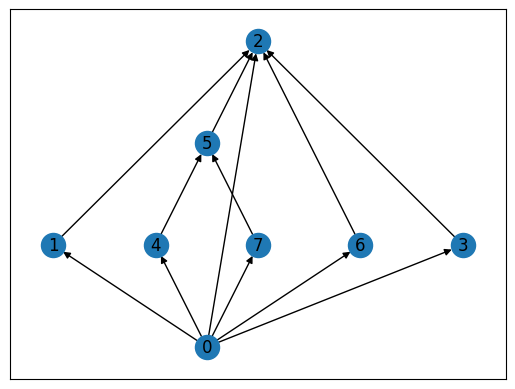

In [2]:
dir_data = create_graph(DIRECTED=True)
nx.draw_networkx(dir_data.G, pos=dir_data.embed)

undir_data = create_graph()

In [3]:
du = Dual(DiGraphData=dir_data, GraphData=undir_data)
du.create_dual()
nx.draw_networkx(du.DualGraphData.G, pos=du.DualGraphData.embed)

In [4]:
du.simplify_vertex_faces()

In [5]:
du.tuple_vertex_faces

{3: (0, 5), 6: (1, 0), 7: (2, 1), 4: (3, 2), 1: (4, 3), 5: (2, 1)}

In [7]:
G = du.DualGraphData.G
nx.dag_longest_path(G)

[4, 3, 2, 1, 0, 5]

In [29]:
def get_longest_path(source, target):
    if source == target:
        return 0, []
    all_paths = [p for p in nx.all_simple_paths(G, source, target)]
    lens = [len(p) for p in all_paths]
    len_longest_path = max(lens)
    ix_longest_path = lens.index(len_longest_path)
    longest_path = all_paths[ix_longest_path]
    return len_longest_path, longest_path
    

In [31]:
source = 4
dual_distances = {}
for v in G.nodes:
        dual_distances[v], path = get_longest_path(source, v)
        ic(v, path)

ic| v: 0, path: [4, 3, 2, 1, 0]
ic| v: 5, path: [4, 3, 2, 1, 0, 5]
ic| v: 1, path: [4, 3, 2, 1]
ic| v: 2, path: [4, 3, 2]
ic| v: 4, path: []
ic| v: 3, path: [4, 3]


In [32]:
dual_distances

{0: 5, 5: 6, 1: 4, 2: 3, 4: 0, 3: 2}

In [26]:
def get_face_distance(v):
    try:
        return dual_distances[v]
    except:
        return None

In [33]:
coords = {}
for k, v in du.tuple_vertex_faces.items():
    l, r = v
    coords[k] = (get_face_distance(l), get_face_distance(r))

coords

{3: (5, 6), 6: (4, 5), 7: (3, 4), 4: (2, 3), 1: (0, 2), 5: (3, 4)}

In [25]:
du.tuple_vertex_faces

{3: (0, 5), 6: (1, 0), 7: (2, 1), 4: (3, 2), 1: (4, 3), 5: (2, 1)}